          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6 

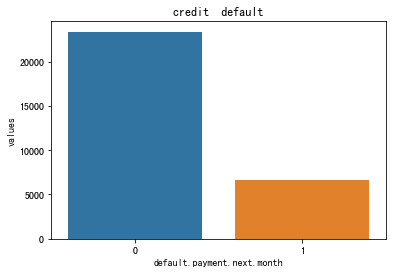

['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']
best pararm: {'svc__C': 1, 'svc__gamma': 0.01}
best score: 0.8172380952380953
accurancy 0.8152
best pararm: {'decisiontreeclassifier__max_depth': 6}
best score: 0.8184285714285714
accurancy 0.8141
best pararm: {'randomforestclassifier__n_estimators': 6}
best score: 0.7982380952380952
accurancy 0.7957
best pararm: {'kneighborsclassifier__n_neighbors': 8}
best score: 0.8058095238095238
accurancy 0.8063


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('./UCI_Credit_Card.csv')
print(data)
print(data.shape)
print(data.describe())

next_month = data['default.payment.next.month'].value_counts()
print(next_month)
df = pd.DataFrame({'default.payment.next.month': next_month.index, 'values': next_month.values})

plt.title('credit  default')
sns.barplot(x='default.payment.next.month',y ='values', data=df	)
plt.show()

data.drop(['ID'], inplace = True, axis = 1)
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
print(columns)
columns.remove('default.payment.next.month')

features = data[columns].values

train_x, test_x, train_y, test_y = train_test_split(features, target, test_size= 0.3)
 
classifier_param_grid = [
            {'svc__C':[1], 'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]} ,
            {'kneighborsclassifier__n_neighbors':[4,6,8]},
]

classifiers = [SVC(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
classifier_names = ['svc', 'decisiontreeclassifier', 'randomforestclassifier', 'kneighborsclassifier']

def GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy'):
	gridsearch = GridSearchCV(estimator = pipeline, param_grid = model_param_grid, scoring = score)
	search = gridsearch.fit(train_x,train_y)
	print('best pararm:', search.best_params_)
	print('best score:', search.best_score_)
	predict_y = gridsearch.predict(test_x)
	print('accurancy %0.4lf' %accuracy_score(test_y, predict_y))
	response = {}
	response['predict_y'] =predict_y
	response['accuracy_score'] = accuracy_score(test_y, predict_y)
	return response


for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):
    pipeline = Pipeline([
            ('scaler', StandardScaler()),
            (model_name, model)
    ])
    result = GridSearchCV_work(pipeline, train_x, train_y, test_x, test_y, model_param_grid , score = 'accuracy')
 



